In [10]:
# importing necessary libraries
import gymnasium as gym
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Creating the mountain car environment

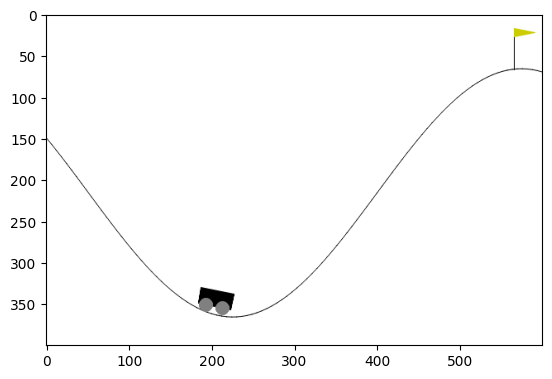

In [11]:
# creating the env
env = gym.make("MountainCar-v0", render_mode='rgb_array', max_episode_steps=-1)

# visualize the environment
env.reset()
plt.imshow(env.render())

### Create an agent without Reinforcement learning

#### Essentially, it is to experiment with a custom code that attempts to solve the environment without RL algorithms. It's not probably feasible to actually solve this environment with a custom simple agent, but to experiment with the amount of variables and situations what has be taken into account while landing the car on top of the mountain.

In [12]:
def simple_agent(observation):
    # get position and velocity
    position, velocity = observation

    # because how the environment works, we have to 
    # check a few things about the position and velocity 
    # before attempting any if-statements
    if isinstance(velocity, dict) and len(velocity) == 0:
        velocity = 0

    # if position has multiple values, choose first one
    if isinstance(position, np.ndarray):
        position = position[0]

    # Choose what to do based on position and velocity
    # i.e. move right or left 

    # There are 3 discrete deterministic actions:
    # 0: Accelerate to the left
    # 1: Don’t accelerate
    # 2: Accelerate to the right

    # START YOUR EXPERIMENTS AFTER THIS PART

    # tips: you need both velocity and position to control the car
    # for example, we should accerelate towards the direction the car is currently going towards

    # => custom if-statements to make a decision for the car
    # first idea: 
    # if car on left side and velocity is negative => accelerate left
    # if car on left side and velocity is positive => accelerate right
    # if car on right side and velocity is negative = accelerate left
    # if car on right side and velocity is positive => accelerate right

    # EXTRA CHALLENGE 1: try to park the car right on top of the flag pole without 
    # sliding over the right side of the mountain

    # EXTRA CHALLENGE 2: don't allow the car bump into the left wall with full speed

    # default action = do nothing
    action = 1

    # this might be between 0.05 - 0.1
    if position > 0.059:
        return 0
    
    # probably also have to stop braking the car after enough slow down

    # you can also define ranges in the if-statements
    # for specific instructions for the car

    # "a brute force" solution just accerelating to the current direction
    if velocity > 0.0 and position < 0.0:
        return 2
    
    if velocity < 0.0 and position > -0.55:
        return 0

    return action

####  NB: the environment starts the car at a random spot between -0.6 and -0.4 (this will affect the momentum slightly). you can lock down the random seed via env.reset(), for example: env.reset(seed=123). Naturally, it's easier to solve this environment manually if the initial position is always the same!

###  Trying how the "simple agent" tries to play the game

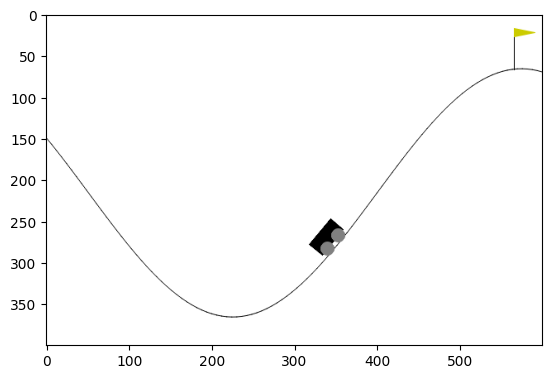

Position: -0.15922826528549194
Velocity: 0.06046706438064575


In [16]:
env.reset()
clear_output(wait=True)
plt.imshow(env.render())
plt.show()

# reset internal values in the environment
# you can also lock down the random seed by using seed-parameter
# i.e. env.reset(seed=123)
observation = env.reset()

# play the environment for 225 steps with our simple agent
for step in range(225):
    action = simple_agent(observation)

    # get the feedback / observations from the environment after taking the step
    observation, reward, done, info, truncate = env.step(action)

    clear_output(wait=True)
    plt.imshow(env.render())
    plt.show()

    print(f"Position: {observation[0]}")
    print(f"Velocity: {observation[1]}")

    # slow down the visual update
    time.sleep(0.001)

env.close()